# DA:623 Assignment: Train and demonstrate the decision boundaries for logistic regression, for binary classification

## Goals
In this lab, you will:
- Load and clean Iris datset.
- Training decision boundary for a logistic regression model.
- Testing the decision boundary on test dataset.

Logistic Regression is a fundamental machine learning algorithm used for binary classification tasks. It models the probability that each input belongs to a particular class. 
Decision boundary is a line, curve, or surface that separates data points belonging to different classes in a binary classification task.

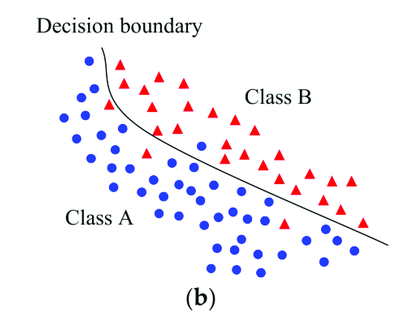

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Dataset
Now lets load the $\mathbf{Iris}$ $\mathbf{dataset}$ from the sklearn.datasets library.

In [18]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

Next, we will extract the features and target labels
- The input variable $X$ is a numpy array which contains all the features from the iris dataset (4 features).
- The output variable $y$ is a numpy array which has target.

In [19]:
# Extract features and target (class) labels
X = iris.data
y = iris.target

Lets make a heatmap to find the correlation between the features.

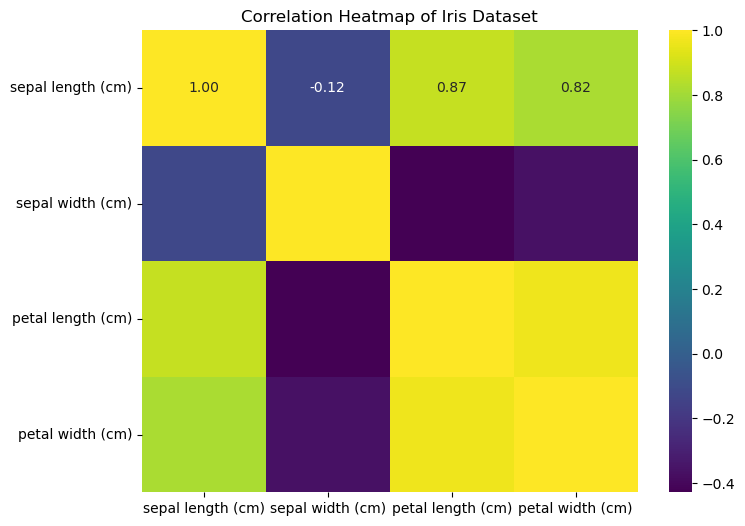

In [20]:
# Compute correlation matrix
corr_matrix = np.corrcoef(iris.data.T)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

- For the sake of simplicity we will be working on only two features (sepal length and sepal width).
- Since we are working on binary classification. We will keep only two types of Iris.

In [21]:
#Using only two features (sepal length and sepal width)
X = iris.data[:, :2]

# Keep only two types of Iris (indices 0 and 1)
X = X[y < 2]
y = y[y < 2]

# Add intercept term to features
X = np.c_[np.ones((X.shape[0], 1)), X]

Let's split the dataset into $\mathbf{Training}$ $\mathbf{dataset}$ and $\textbf{Testing dataset.}$

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

* For logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0$, predict $y=0$
  
  

We will initialize parameters and set values for hyperparameters.

In [23]:
# Initialize parameters (weights)
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
alpha = 0.01
iterations = 1000

Writing Sigmoid function.

In [24]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Writing cost function for logistic regression.

In [25]:
# Cost function (binary cross-entropy)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

Writing Gradiant descent function for minimization of cost.

In [26]:
# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    
    return theta, costs

Training the logistic regression model.

In [27]:
# Train logistic regression model
theta_final, costs = gradient_descent(X_train, y_train, theta, alpha, iterations)

Prediction Function. (Not mandatory, just for completion of logistic regresion model).

In [32]:
# Predict function
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return np.round(probabilities)

# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [33]:
# Predict on training set
y_train_pred = predict(X_train, theta_final)

# Predict on testing set
y_test_pred = predict(X_test, theta_final)

# Calculate accuracy
train_accuracy = accuracy(y_train, y_train_pred)
test_accuracy = accuracy(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9875
Testing Accuracy: 1.0


## Plotting decision boundary

Now, let's understand how the logistic regression model is making predictions.

- We examine the estimated parameters.

In [29]:
theta

array([-0.1513461 ,  0.92172235, -1.52964691])

In [31]:
theta_final

array([-0.1513461 ,  0.92172235, -1.52964691])


- Therfore, our logistic regression model will be,

  $f(\mathbf{x}) = g(-0.15 + 0.9x_0 - 1.5x_1)$


- Therefore the model predicts $y=1$ if $-0.15 + 0.9x_0 - 1.5x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-0.15 + 0.9x_0 - 1.5x_1 = 0$, which is equivalent to $1.5x_1 = -0.15 + 0.9x_0$.

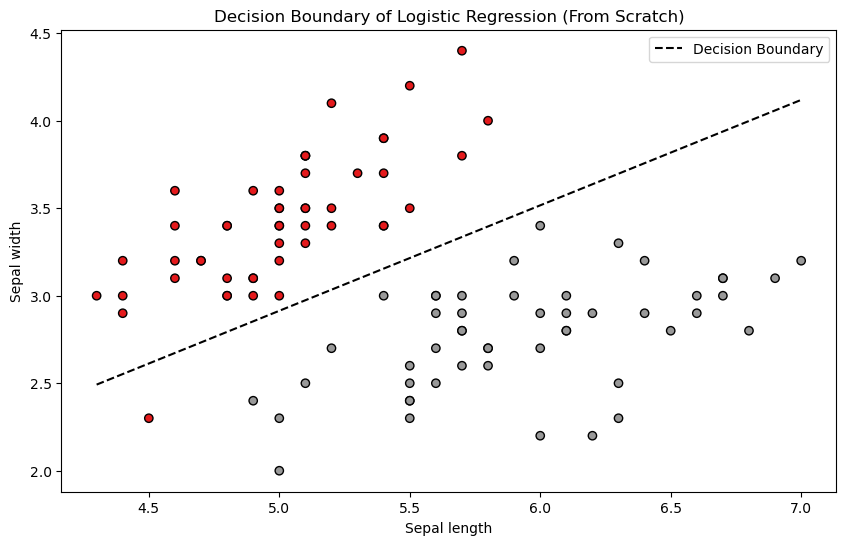

In [30]:
# Plot decision boundary
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Plot decision boundary line
x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]
plt.plot(x_values, y_values, color='k', linestyle='--', label='Decision Boundary')

# Set labels and title
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary of Logistic Regression (From Scratch)')

# Show plot
plt.legend()
plt.show()

## Conclusion
In this assignment,we applied logistic regression from scratch to perform binary classification on the Iris dataset, distinguishing between two types of Iris flowers based on their sepal length and width. The decision boundary plotted demonstrates the separation between the two classes, with the model effectively classifying the data points based on the learned parameters.